In [ ]:
import numpy as np
import pandas as pd
from gensim.models import Word2Vec

In [ ]:
train_import = pd.read_json('/content/drive/MyDrive/NLP Project Files/Maddy/data/train.jsonl', lines = True)
test_import = pd.read_json('/content/drive/MyDrive/NLP Project Files/Maddy/data/validation.jsonl', lines = True)

In [ ]:
train_import.head()

,uuid,postId,postText,postPlatform,targetParagraphs,targetTitle,targetDescription,targetKeywords,targetMedia,targetUrl,provenance,spoiler,spoilerPositions,tags
0,0af11f6b-c889-4520-9372-66ba25cb7657,532quh,"[Wes Welker Wanted Dinner With Tom Brady, But ...",reddit,[It’ll be just like old times this weekend for...,"Wes Welker Wanted Dinner With Tom Brady, But P...",It'll be just like old times this weekend for ...,"new england patriots, ricky doyle, top stories,","[http://pixel.wp.com/b.gif?v=noscript, http://...",http://nesn.com/2016/09/wes-welker-wanted-dinn...,"{'source': 'anonymized', 'humanSpoiler': 'They...",[how about that morning we go throw?],"[[[3, 151], [3, 186]]]",[passage]
1,b1a1f63d-8853-4a11-89e8-6b2952a393ec,411701128456593408,[NASA sets date for full recovery of ozone hole],Twitter,[2070 is shaping up to be a great year for Mot...,Hole In Ozone Layer Expected To Make Full Reco...,2070 is shaping up to be a great year for Moth...,"ozone layer,ozone hole determined by weather,M...",[http://s.m.huffpost.com/assets/Logo_Huffingto...,http://huff.to/1cH672Z,"{'source': 'anonymized', 'humanSpoiler': '2070...",[2070],"[[[0, 0], [0, 4]]]",[phrase]
2,008b7b19-0445-4e16-8f9e-075b73f80ca4,380537005123190784,[This is what makes employees happy -- and it'...,Twitter,"[Despite common belief, money isn't the key to...",Intellectual Stimulation Trumps Money For Empl...,By: Chad Brooks \r\nPublished: 09/18/2013 06:4...,"employee happiness money,employee happiness in...",[http://i.huffpost.com/gen/1359674/images/o-HA...,http://huff.to/1epfeaw,"{'source': 'anonymized', 'humanSpoiler': 'Inte...",[intellectual stimulation],"[[[1, 186], [1, 210]]]",[phrase]
3,31ecf93c-3e21-4c80-949b-aa549a046b93,844567852531286016,[Passion is overrated — 7 work habits you need...,Twitter,"[It’s common wisdom. Near gospel really, and n...","‘Follow your passion’ is wrong, here are 7 hab...",There's a lot more to work that loving your job,"business, work-life, careers",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[Purpose connects us to something bigger and i...,"[[[11, 25], [11, 101]], [[17, 56], [17, 85]], ...",[multi]
4,31b108a3-c828-421a-a4b9-cf651e9ac859,814186311573766144,[The perfect way to cook rice so that it's per...,Twitter,"[Boiling rice may seem simple, but there is a ...",Revealed: The perfect way to cook rice so that...,The question 'How does one cook rice properly?...,"Quora,users,share,perfect,way,cook,rice",None,None,"{'source': 'anonymized', 'humanSpoiler': None,...",[in a rice cooker],"[[[5, 60], [5, 76]]]",[phrase]


In [ ]:
train_import.isnull().sum()

uuid                    0
postId                  0
postText                0
postPlatform            0
targetParagraphs        0
targetTitle             0
targetDescription     267
targetKeywords       1084
targetMedia           515
targetUrl             483
provenance              0
spoiler                 0
spoilerPositions        0
tags                    0
dtype: int64

In [ ]:
train_import.shape

(3200, 14)

In [ ]:
train_import['tags'].map(lambda x: len(x)).max()

1

In [ ]:
train_import['tags'] = train_import['tags'].map(lambda x: x[0])

In [ ]:
train_import.isnull().sum()

uuid                    0
postId                  0
postText                0
postPlatform            0
targetParagraphs        0
targetTitle             0
targetDescription     267
targetKeywords       1084
targetMedia           515
targetUrl             483
provenance              0
spoiler                 0
spoilerPositions        0
tags                    0
dtype: int64

In [ ]:
train_import['tags'].value_counts()

phrase     1367
passage    1274
multi       559
Name: tags, dtype: int64

In [ ]:
train_import.uuid.nunique()/ len(train_import)

1.0

In [ ]:
train_import = train_import.set_index('uuid')

In [ ]:
train_import['processedParagpraphs'] = train_import['targetParagraphs'].map(lambda x: '. '.join(x))

In [ ]:
train_import['processedText'] = train_import['postText'].map(lambda x: x[0])

In [ ]:
import nltk
import re
from nltk.corpus import stopwords

In [ ]:
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [ ]:
one_hot_encoded = pd.get_dummies(train_import['postPlatform'])
one_hot_encoded

,Facebook,Twitter,reddit
uuid,,,
0af11f6b-c889-4520-9372-66ba25cb7657,0,0,1
b1a1f63d-8853-4a11-89e8-6b2952a393ec,0,1,0
008b7b19-0445-4e16-8f9e-075b73f80ca4,0,1,0
31ecf93c-3e21-4c80-949b-aa549a046b93,0,1,0
31b108a3-c828-421a-a4b9-cf651e9ac859,0,1,0
...,...,...,...
92578045-699f-4957-a3c5-cff2c3874dae,0,1,0
51682121-df0b-4289-a95f-e1bc3d181306,1,0,0
9c45ca67-38c4-47b4-aa0d-48434bae09fc,0,1,0


In [ ]:
url_present = train_import['targetUrl'].map(lambda x: 0 if x == None else 1)

In [ ]:
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
ps = WordNetLemmatizer()

stop_words = stopwords.words('english')

corpus = []
morpus = []
for i in range(0, len(train_import)):

    kb1 = ' '.join([ps.lemmatize(word) for word in  re.sub('[^a-zA-Z]', ' ', train_import['processedParagpraphs'][i]).lower().split() if word not in stop_words])
    kb2 = ' '.join([ps.lemmatize(word) for word in  re.sub('[^a-zA-Z]', ' ', train_import['processedText'][i]).lower().split() if word not in stop_words])

    corpus.append(kb1)
    morpus.append(kb2)

In [ ]:
import gensim
word2vec_google = gensim.models.KeyedVectors.load_word2vec_format('/content/drive/MyDrive/NLP Project Files/Maddy/GoogleNews-vectors-negative300.bin.gz', binary=True)


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.layers import Embedding
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense
     

In [ ]:
# voc_size = 15000
# corpus_1 =[one_hot(words,voc_size)for words in corpus] 
# morpus_1 = [one_hot(words,voc_size)for words in morpus] 

from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(corpus + morpus)
corpus_sequences = tokenizer.texts_to_sequences(corpus)
morpus_sequences = tokenizer.texts_to_sequences(morpus)


In [ ]:
maxi=-1
for i,rev in enumerate(corpus):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(maxi)



13826


In [ ]:
maxi=-1
for i,rev in enumerate(morpus):
    tokens=rev.split()
    if(len(tokens)>maxi):
        maxi=len(tokens)
print(maxi)

15


In [ ]:
sent_length_1 = 10000
sent_length_2 = 15

embedded_docs_1=pad_sequences(corpus_sequences,padding='pre',maxlen= sent_length_1)
embedded_docs_2=pad_sequences(morpus_sequences,padding='pre',maxlen=sent_length_2)

print(embedded_docs_2)
print(embedded_docs_2.shape)

[[    0     0     0 ... 25759    99   199]
 [    0     0     0 ...  3023  6026  1002]
 [    0     0     0 ...   494   411  5908]
 ...
 [    0     0     0 ...   461  3119  8962]
 [    0     0     0 ...  3011 16449  1676]
 [    0     0     0 ...    50   827   599]]
(3200, 15)


In [ ]:
voc_size = len(tokenizer.word_index) + 1
output_dim=300

In [ ]:
vocab = word2vec_google.key_to_index
word_vec_dict={}

for word in vocab:
  word_vec_dict[word]= word2vec_google.get_vector(word)
print("The no of key-value pairs : ",len(word_vec_dict))

The no of key-value pairs :  3000000


In [ ]:
embed_matrix= np.zeros(shape=(voc_size,output_dim))

for word,i in tokenizer.word_index.items():
  embed_vector= word_vec_dict.get(word)
  if embed_vector is not None:  # word is in the vocabulary learned by the w2v model
    embed_matrix[i]=embed_vector
  # if word is not found then embed_vector corressponding to that vector will stay zero.

In [ ]:
one_hot_encoded.shape

(3200, 3)

In [ ]:
import keras
from keras.models import Model
from keras.layers import Concatenate, Dropout, BatchNormalization
from keras.layers import Activation
from keras.layers import Bidirectional, LSTM
from keras.layers import Dense
from keras.initializers import Constant
from keras.regularizers import l1_l2

l1_reg = 0.001
l2_reg = 0.001

input1 = keras.Input(shape=(sent_length_1,))
embed1 = Embedding(input_dim=voc_size, output_dim=output_dim, weights=[embed_matrix], trainable=False, input_length=sent_length_1)(input1)
lstm1 = Bidirectional(LSTM(64, return_sequences=True))(embed1)
lstm1 = Dropout(0.3)(lstm1)
lstm1 = Bidirectional(LSTM(32))(lstm1)
lstm1 = BatchNormalization()(lstm1)
dense_a = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(lstm1)
drop_b = Dropout(0.3)(dense_a)
dense_b = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(drop_b)

input2 = keras.Input(shape=(sent_length_2,))
embed2 = Embedding(input_dim=voc_size, output_dim=output_dim, weights=[embed_matrix], trainable=False, input_length=sent_length_2)(input2)
lstm2 = Bidirectional(LSTM(64, return_sequences=True))(embed2)
lstm2 = Dropout(0.3)(lstm2)
lstm2 = Bidirectional(LSTM(32))(lstm2)
lstm2 = BatchNormalization()(lstm2)
dense_c = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(lstm2)
drop_c = Dropout(0.3)(dense_c)
dense_d = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(drop_c)

#input3 = keras.Input(shape=(one_hot_encoded.shape[1],))
input4 = keras.Input(shape=(1,))

all_mix = Concatenate(axis=1)([dense_b, dense_d, input4])
full_dens = Dense(64, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(all_mix)
full_dens = BatchNormalization()(full_dens)
full_dens = Dropout(0.3)(full_dens)
full_dens = Dense(32, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(full_dens)
full_dens = BatchNormalization()(full_dens)
full_dens = Dropout(0.3)(full_dens)
full_dens = Dense(16, activation='relu', kernel_regularizer=l1_l2(l1=l1_reg, l2=l2_reg))(full_dens)
dens = Dense(3, activation='softmax')(full_dens)

model = Model(inputs=[input1, input2, input4], outputs=dens)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', 'AUC'])


In [ ]:
import numpy as np
X_final_1= np.array(embedded_docs_1)
X_final_2 = np.array(embedded_docs_2)

#train_import['tags'] = train_import['tags'].replace({"phrase": 0, "passage": 1, "multi": 2 })
dummies = pd.get_dummies(train_import['tags']) 

y_final = np.array(dummies)

In [ ]:
from sklearn.model_selection import train_test_split
X1_train, X1_val, X2_train, X2_val, X3_train, X3_val, X4_train, X4_val, y_train, y_val = train_test_split(X_final_1, X_final_2, url_present, one_hot_encoded, y_final, test_size=0.2, random_state=42, stratify = y_final)

In [ ]:
from sklearn.utils import class_weight

class_weights = class_weight.compute_class_weight('balanced', classes = np.unique(y_train.argmax(axis=1)), y = y_train.argmax(axis=1))
class_weights_dict = dict(enumerate(class_weights))


In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, EarlyStopping

checkpoint = ModelCheckpoint("/content/drive/MyDrive/NLP Project Files/task_1_4_input_weights.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
early_stopping = EarlyStopping(monitor='val_loss', patience= 7, verbose=1, mode='min')

with tf.device("/gpu:0"): 
    history = model.fit([X1_train, X2_train, X3_train], y_train, validation_data=([X1_val, X2_val, X3_val], y_val), epochs= 100, batch_size=128, verbose=1, class_weight=class_weights_dict, callbacks=[checkpoint, early_stopping])


Epoch 1/100
20/20 [==============================] - ETA: 0s - loss: 4.1770 - accuracy: 0.3836 - auc: 0.5674
Epoch 1: val_accuracy improved from -inf to 0.44375, saving model to /content/drive/MyDrive/NLP Project Files/task_1_4_input_weights.h5
20/20 [==============================] - 40s 1s/step - loss: 4.1770 - accuracy: 0.3836 - auc: 0.5674 - val_loss: 3.5692 - val_accuracy: 0.4437 - val_auc: 0.5332
Epoch 2/100
20/20 [==============================] - ETA: 0s - loss: 3.8287 - accuracy: 0.3949 - auc: 0.5867
Epoch 2: val_accuracy did not improve from 0.44375
20/20 [==============================] - 22s 1s/step - loss: 3.8287 - accuracy: 0.3949 - auc: 0.5867 - val_loss: 3.5366 - val_accuracy: 0.1797 - val_auc: 0.4090
Epoch 3/100
20/20 [==============================] - ETA: 0s - loss: 3.6105 - accuracy: 0.3977 - auc: 0.5952
Epoch 3: val_accuracy did not improve from 0.44375
20/20 [==============================] - 22s 1s/step - loss: 3.6105 - accuracy: 0.3977 - auc: 0.5952 - val_loss: 

In [ ]:
test_import['tags'].map(lambda x: x[0]).value_counts(normalize = True)

phrase     0.41875
passage    0.40250
multi      0.17875
Name: tags, dtype: float64

In [ ]:
train_import['tags'].value_counts(normalize = True)

phrase     0.427187
passage    0.398125
multi      0.174687
Name: tags, dtype: float64

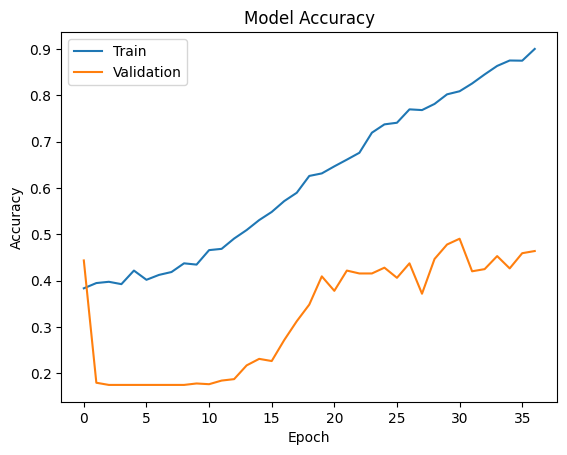

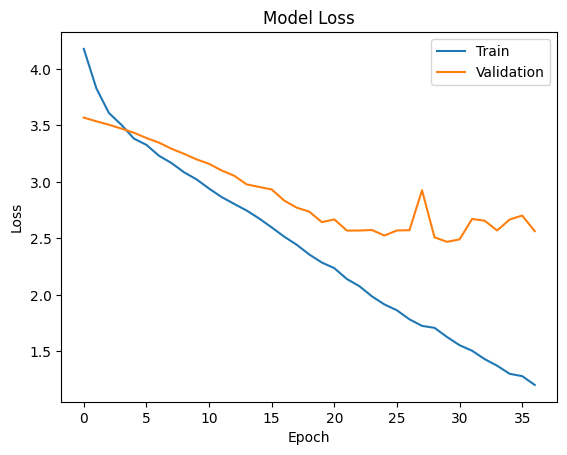

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

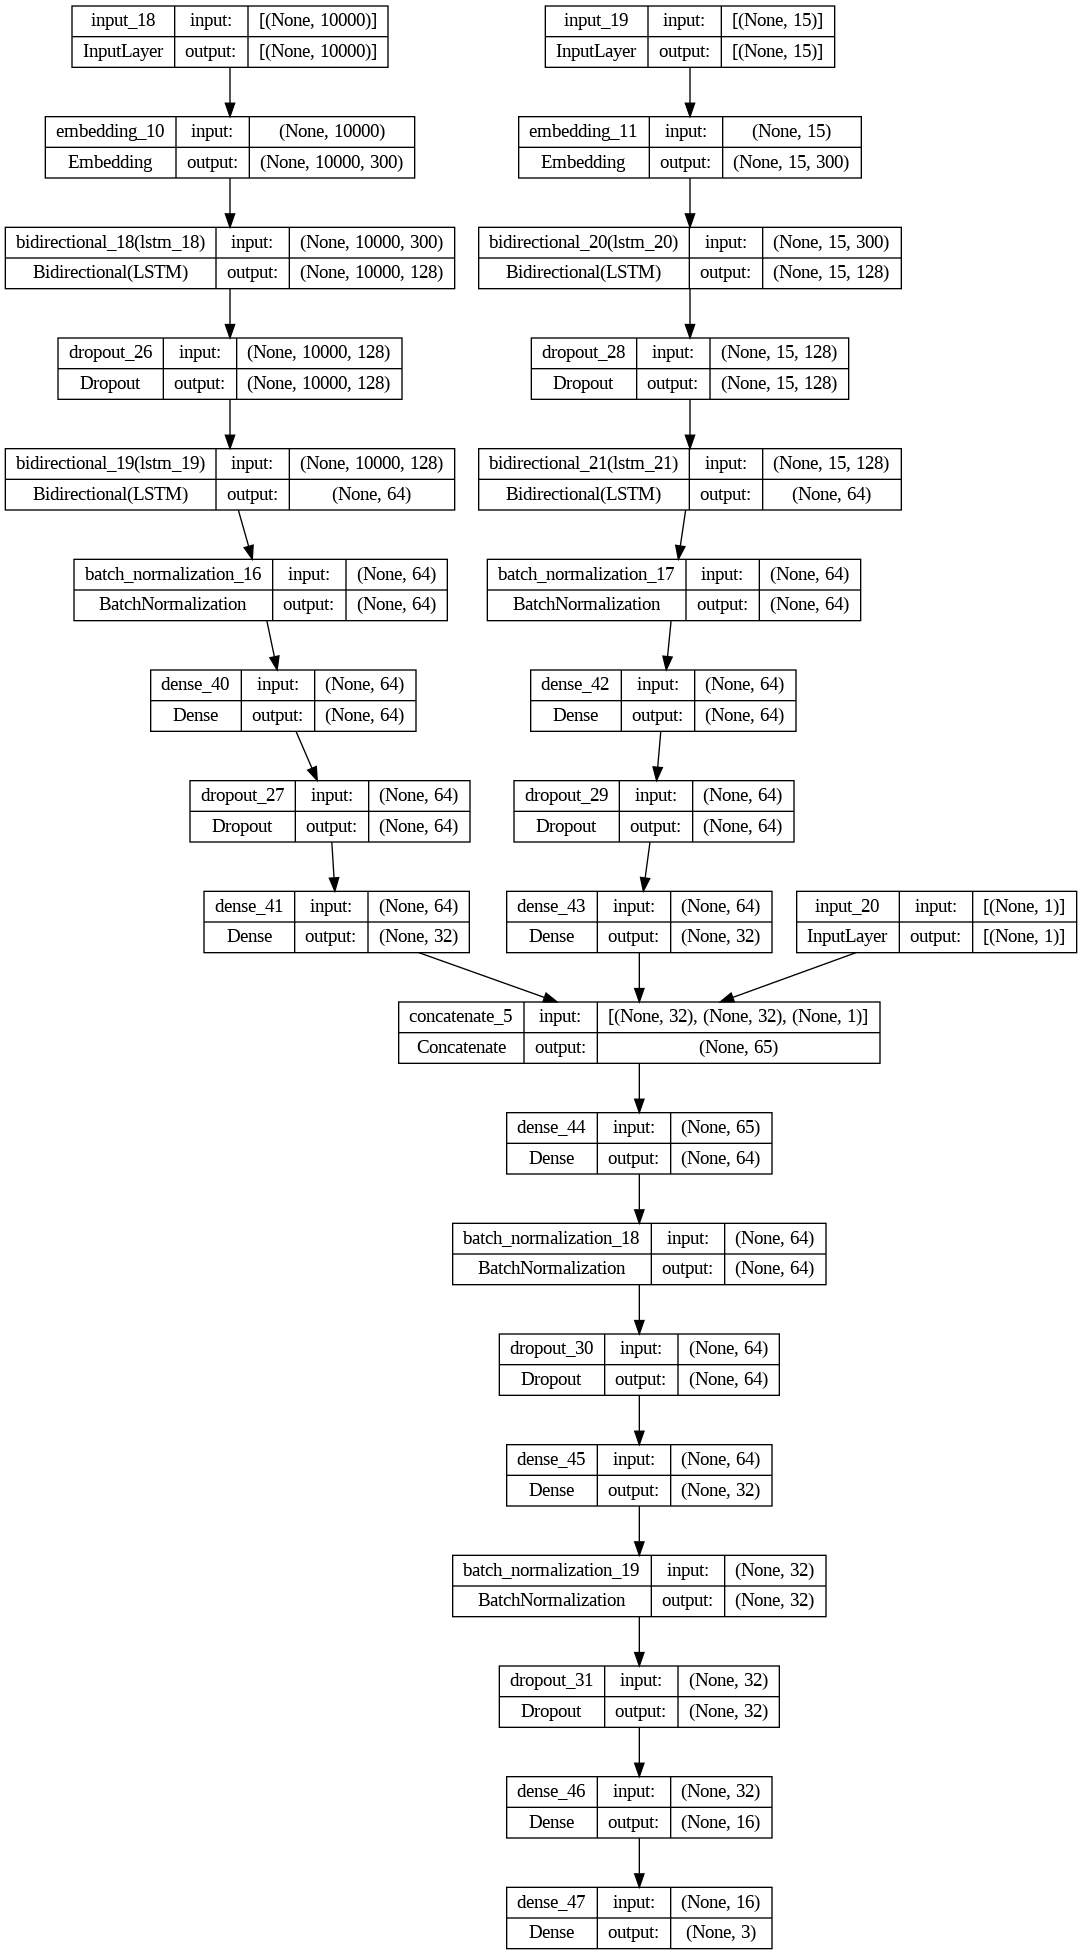

In [ ]:
from keras.utils import plot_model

plot_model(model, to_file='/content/drive/MyDrive/NLP Project Files/model_plot.png', show_shapes=True, show_layer_names=True)